# REAL DATA

In [1]:
import numpy as np

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [3]:
def VandermondeMatrix(x, y, n):
    X = np.c_[np.ones(len(x))]
    for i in range(1, n+1):
        # x-terms
        X = np.c_[X, x**(i)]
        # y-terms
        X = np.c_[X, y**(i)]
        # Cross terms
        for j in range(i-1, 0, -1):
            X = np.c_[X, (x**(j))*(y**(i-j))]
            
    return X

In [4]:
def linreg_ols(X, z):
    
    # Solving for beta
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(z)
    
    y_predict_ols = X @ beta
    
    return beta, y_predict_ols

In [5]:
def ridgereg(X, z, lambda_ridge):

    # Solving for beta
    beta_ridge = np.linalg.inv(np.transpose(X).dot(X) + lambda_ridge*np.identity(X.shape[1])).dot(np.transpose(X)).dot(z)

    y_predict_ridge = X @ beta_ridge
    
    return beta_ridge, y_predict_ridge

In [18]:
from sklearn.linear_model import Lasso

def lassoreg(X, z, lambda_lasso):
    
    las = Lasso(alpha=lambda_lasso, fit_intercept = False)
    las.fit(X, z)
    
    beta = las.coef_#[:,np.newaxis]
    
    y_predict_lasso = X @ beta
    
    R2_lasso = las.score(X, z)
    
    return beta, y_predict_lasso, R2_lasso

In [7]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

In [8]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

### DATA

In [9]:
# CODE TO PLOT THE DATA (provided in the assignment text)
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')

""" 
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
"""

" \n# Show the terrain\nplt.figure()\nplt.title('Terrain over Norway 1')\nplt.imshow(terrain1, cmap='gray')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.show()\n"

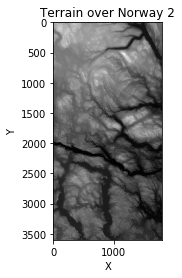

In [10]:
# CODE TO PLOT THE DATA (provided in the assignment text)
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain2 = imread('SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [67]:
# Modified code from last year Piazza
[n, m] = terrain1.shape

patch_size_row = 100
patch_size_col = 50

rows = np.linspace(0,1,patch_size_row)
cols = np.linspace(0,1,patch_size_col)

[C, R] = np.meshgrid(cols, rows)

x = C.reshape(-1,1)
y = R.reshape(-1,1)

num_data = patch_size_row * patch_size_col

num_patches = 30

np.random.seed(3059)

row_starts = np.random.randint(0,n-patch_size_row,num_patches)
col_starts = np.random.randint(0,m-patch_size_col,num_patches)

R2_ols = list()
R2_ridge = list()
R2_lasso_l = list()
MSE_ols = list()
MSE_ridge = list()
MSE_lasso = list()

for i,row_start, col_start in zip(np.arange(num_patches), row_starts, col_starts):
    row_end = row_start + patch_size_row
    col_end = col_start + patch_size_col
    
    patch = terrain1[row_start:row_end, col_start:col_end]
    
    z = patch.reshape(-1,1)
    
    X = VandermondeMatrix(x, y, 15)
    
    beta_ols, fitted_patch_ols = linreg_ols(X,z)
    beta_ridge, z_predict_ridge = ridgereg(X, z, lambda_ridge = 0.001)
    beta_lasso, z_predict_lasso, R2_lasso = lassoreg(X, z, lambda_lasso = 0.01)
    
    R2_s = R2(fitted_patch_ols, z)
    MSE_s = MSE(fitted_patch_ols, z)
    
    R2_ols.append(R2_s)
    MSE_ols.append(MSE_s)
    
    R2_r = R2(z_predict_ridge, z)
    MSE_r = MSE(z_predict_ridge, z)
    
    R2_ridge.append(R2_r)
    MSE_ridge.append(MSE_r)
    
    MSE_l = MSE(z_predict_lasso, z)
    R2_l = R2_lasso
    
    R2_lasso_l.append(R2_l)
    MSE_lasso.append(MSE(z_predict_lasso, z))
    
print("OLS R2 mean", np.mean(R2_ols))
print("RIDGE R2 mean", np.mean(R2_ridge))
print("LASSO R2 mean", np.mean(R2_lasso_l))
print("OLS MSE mean", np.mean(MSE_ols))
print("RIDGE MSE mean", np.mean(MSE_ridge))
print("LASSO MSE mean", np.mean(MSE_lasso))

C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


OLS R2 mean -0.06836072198032912
RIDGE R2 mean 0.9415665542500806
LASSO R2 mean 0.8950441437730723
OLS MSE mean 2028831.1575503452
RIDGE MSE mean 276.0587380585434
LASSO MSE mean 178071263.9638828


In [87]:
def bootstrap(X, z, statistic, method, number_of_bootstraps, la):
    stat = np.empty([number_of_bootstraps, X.shape[1]])
    max_idx = X.shape[0] # highest number of indices
    beta = np.empty([number_of_bootstraps, X.shape[1]])
    z_predict = np.empty([number_of_bootstraps, X.shape[1]])
    R2_lasso = np.zeros(number_of_bootstraps)
    
    np.random.seed(4155)
    
    for i in range(number_of_bootstraps):
           
        if method == 'OLS':
            idx = np.random.randint(0, max_idx, max_idx)
            beta[i], z_predict[i] = linreg_ols(X[idx], z[idx])
                            
        elif method == 'Ridge':
            idx = np.random.randint(0, max_idx, max_idx)
            beta[i], z_predict[i] = ridgereg(X[idx], z[idx], la)
            
        elif method == 'LASSO':
            idx = np.random.randint(0, max_idx, max_idx)
            beta[i], z_predict[i], R2_lasso[i] = lassoreg(X[idx], z[idx], la)
            
        else:
            break
         
        if statistic:
            stat[i] = statistic(beta)
        
    if not statistic:
        if method == 'OLS' or method == 'Ridge':
            return beta, z_predict
        if method == 'LASSO':
            return beta, z_predict, R2_lasso

In [86]:
z.shape[0]
X.shape[0]

5000

In [90]:
from sklearn.model_selection import train_test_split

[n, m] = terrain1.shape

patch_size_row = 100
patch_size_col = 50

rows = np.linspace(0,1,patch_size_row)
cols = np.linspace(0,1,patch_size_col)

[C, R] = np.meshgrid(cols, rows)

x = C.reshape(-1,1)
y = R.reshape(-1,1)

num_data = patch_size_row * patch_size_col

num_patches = 5

np.random.seed(3059)

row_starts = np.random.randint(0,n-patch_size_row,num_patches)
col_starts = np.random.randint(0,m-patch_size_col,num_patches)

R2_ols = list()
R2_ridge = list()
R2_lasso_l = list()
MSE_ols = list()
MSE_ridge = list()
MSE_lasso = list()

for i,row_start, col_start in zip(np.arange(num_patches), row_starts, col_starts):
    row_end = row_start + patch_size_row
    col_end = col_start + patch_size_col
    
    patch = terrain1[row_start:row_end, col_start:col_end]
    
    z = patch.reshape(-1,1)
    
    X = VandermondeMatrix(x, y, 5)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    
    beta_bootstrap_ols, z_predict_boot_ols = bootstrap(X_train, z_train, statistic = False, method = 'OLS', number_of_bootstraps = 5000, la = None)
    beta_bootstrap_ridge, z_predict_boot_ridge = bootstrap(X_train, z_train, statistic = False, method = 'Ridge', number_of_bootstraps = 5000, la = 0.01)
    beta_bootstrap_lasso, z_predict_boot_lasso, R2_lasso = bootstrap(X_train, z_train, statistic = False, method = 'LASSO', number_of_bootstraps = 5000, la = 0.01)

    beta_mean_ols = np.mean(beta_bootstrap_ols, axis=0)
    beta_mean_ridge = np.mean(beta_bootstrap_ridge, axis=0)
    beta_mean_lasso = np.mean(beta_bootstrap_lasso, axis=0)

    z_pred_ols = X_test @ beta_mean_ols
    z_pred_ridge = X_test @ beta_mean_ridge
    z_pred_lasso = X_test @ beta_mean_lasso

    R2_ols.append(R2(z_test, z_pred_ols))
    R2_ridge.append(R2(z_test, z_pred_ridge))
    R2_lasso_l.append(R2(z_test, z_pred_lasso))
    MSE_ols.append(MSE(z_test, z_pred_ols))
    MSE_ridge.append(MSE(z_test, z_pred_ridge))
    MSE_lasso.append(MSE(z_test, z_pred_lasso))

    
print("OLS R2 mean", np.mean(R2_ols))
print("RIDGE R2 mean", np.mean(R2_ridge))
print("LASSO R2 mean", np.mean(R2_lasso_l))
print("OLS MSE mean", np.mean(MSE_ols))
print("RIDGE MSE mean", np.mean(MSE_ridge))
print("LASSO MSE mean", np.mean(MSE_lasso))

ValueError: could not broadcast input array from shape (21,1) into shape (21)

In [ ]:
degrees = np.arange(1, 10, 1)
R2_scores_ols = list()
R2_scores_ridge = list()
R2_scores_lasso = list()
MSE_scores_ols = list()
MSE_scores_ridge = list()
MSE_scores_lasso = list()
for n in degrees:
    X = VandermondeMatrix(x, y, n)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    
    beta_bootstrap_ols, z_predict_boot_ols = bootstrap(X_train, z_train, statistic = False, method = 'OLS', number_of_bootstraps = 5000, la = None)
    beta_bootstrap_ridge, z_predict_boot_ridge = bootstrap(X_train, z_train, statistic = False, method = 'Ridge', number_of_bootstraps = 5000, la = 0.01)
    beta_bootstrap_lasso, z_predict_boot_lasso, R2_lasso = bootstrap(X_train, z_train, statistic = False, method = 'LASSO', number_of_bootstraps = 5000, la = 0.01)

    
    beta_mean_ols = np.mean(beta_bootstrap_ols, axis=0)
    beta_mean_ridge = np.mean(beta_bootstrap_ridge, axis=0)
    beta_mean_lasso = np.mean(beta_bootstrap_lasso, axis=0)

    z_pred_ols = X_test @ beta_mean_ols
    z_pred_ridge = X_test @ beta_mean_ridge
    z_pred_lasso = X_test @ beta_mean_lasso

    R2_scores_ols.append(R2(z_test, z_pred_ols))
    R2_scores_ridge.append(R2(z_test, z_pred_ridge))
    R2_scores_lasso.append(R2(z_test, z_pred_lasso))
    MSE_scores_ols.append(MSE(z_test, z_pred_ols))
    MSE_scores_ridge.append(MSE(z_test, z_pred_ridge))
    MSE_scores_lasso.append(MSE(z_test, z_pred_lasso))
    
    
    print('n:', n, '\n')
    print('R2 \n')
    print('OLS', R2(z_test, z_pred_ols), '\n RIDGE', R2(z_test, z_pred_ridge), '\n LASSO', R2(z_test, z_pred_lasso))
    print('\n MSE \n')
    print('OLS', MSE(z_test, z_pred_ols), '\n RIDGE', MSE(z_test, z_pred_ridge), '\n LASSO', MSE(z_test, z_pred_lasso))